Verzeo major project 
By Bhadresh V K

In [ ]:
import pandas as pd
import re,string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
resturant_df = pd.read_csv('/content/Restaurant_Reviews.tsv', delimiter = '\t', quoting = 3);
resturant_df.head()


,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [ ]:
resturant_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [ ]:

resturant_df.Liked.value_counts()

1    500
0    500
Name: Liked, dtype: int64

In [ ]:
resturant_df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


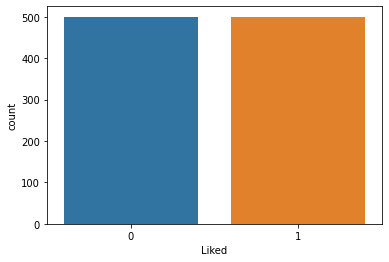

In [ ]:

sns.countplot(x=resturant_df.Liked);

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV, train_test_split 
from sklearn.linear_model import LogisticRegression

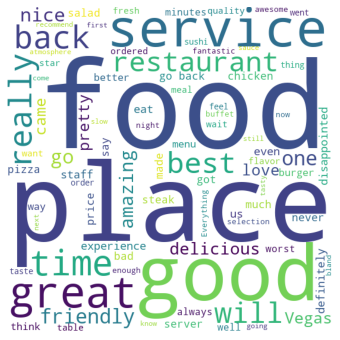

In [ ]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

import matplotlib.pyplot as plt 


def word_cloud(text):


    stopword_list = set(STOPWORDS) 

   
    word_cloud = WordCloud(width = 550, height = 550, 
                           background_color ='white', 
                           stopwords = stopword_list, 
                           min_font_size = 12).generate(text) 

    
    plt.figure(figsize = (8, 6)) 

   
    plt.imshow(word_cloud) 

    
    plt.axis("off")  

    
    plt.show()
    
paragraph=' '.join(resturant_df.Review.tolist())
word_cloud(paragraph)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

from nltk.tokenize import RegexpTokenizer


token = RegexpTokenizer(r'[a-zA-Z0-9]+')

cv = CountVectorizer(lowercase=True,
                     stop_words='english',
                     ngram_range = (1,1),
                     tokenizer = token.tokenize)

text_counts= cv.fit_transform(resturant_df['Review'])

print(text_counts.shape)

(1000, 1834)


In [ ]:
count_df = pd.DataFrame(text_counts.toarray(),columns=cv.get_feature_names())
count_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,00,1,10,100,11,12,15,17,1979,2,...,year,years,yellow,yellowtail,yelpers,yucky,yukon,yum,yummy,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(text_counts, 
                                                    resturant_df['Liked'], 
                                                    test_size=0.3, 
                                                    random_state=1)

In [ ]:
from sklearn.svm import SVC 
svcm = SVC()
svcm.fit(X_train,y_train)

SVC()

In [ ]:
op=svcm.predict(X_test)


In [ ]:
from sklearn import metrics 
print(metrics.accuracy_score(y_test,op))

0.7533333333333333


In [ ]:
#saving model
import joblib
joblib.dump(svcm,'Project')

['Project']

In [ ]:
import joblib
model=joblib.load('Project')

In [ ]:
#predict the output of a new review

newreview=['it was very nice and wish to come back once again']



stest=cv.transform(newreview)
a=model.predict(stest)
if a[0]==0:
  print("Negative sentiment ")

else :
  print("Positive sentiment ")  


Positive sentiment 


In [ ]:
#asking for review from user and predicting sentiment
s=input()
st=['"'+s+'"']
string=['get lost useless']



stest=cv.transform(st)
a=model.predict(stest)
if a[0]==0:
  print("Negative Review :(")

else :
  print("Possitive Review:D")  

it was awesome
Possitive Review:D
